This week we will compute motion energy in a set of movies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In the following several exercises, we will construct a motion energy Gabor filter! The equation for a motion energy Gabor function (which defines a motion energy Gabor filter) is:

## $G_{i,p}(x, y, t) = e^{-\frac{(x - cx_i)^2 + (y - cy_i)^2}{2 \sigma_{xy, i}^2} - \frac{(t-ct_i)^2}{2\sigma_{t, i}^2}} * sin((x-cx_i) * fx_i + (y-cy_i) * fy_i + (t-ct_i)ft_i + p)$

Let's break this down into parts: we have a 3D Gaussian (in red):
## <span style="color:red">$G_{i,p}(x, y, t) = e^{-\frac{(x - cx_i)^2 + (y - cy_i)^2}{2\sigma_{xy, i}^2} - \frac{(t-ct_i)^2}{2\sigma_{t, i}^2}}$</span>  *
...times a 3D grating (in blue):
## <span style="color:blue">$ sin((x-cx_i) * fx_i + (y-cy_i) * fy_i + (t-ct_i)ft_i + p)$</span>

Code up the Gaussian first! 

## Exercise 01: 
Define a function to make a 3D Gaussian. It should take parameters cx, cy, sigma_xy, and sigma_t, and should have default values for x, y, and t (which will define the visual and temporal spaces over which the Gaussian is defined). NOTE: by convention here, we will define t as being a linearly spaced variable from 0 to 1 over 10 frames (for the stimuli we will use, 10 frames / 15 frames/second = 0.6666 seconds worth of movie). 

So: 

```python
def make_3d_gauss(cx, cy, sigma_x, sigma_y, sigma_t, x=some_variable, y=some_variable, t=some_variable):
    gauss = 0 # Some math!
    return gauss
```

When you are done, you should have a stack of images (X x Y x Time), i.e. (96 x 96 x 10). Show each of these images in a separate subplot to see what you've generated! (hint: use `plt.subplots()` and `plt.imshow()`, or better still `ax.imshow()` from each of your subplot axes)

In [2]:
# Answer, a (function)
n_pix = 96
t_size = 10
dx = np.linspace(0, 1, n_pix)
dy = np.linspace(0, 1, n_pix) # Assumed to be square...
dt = np.linspace(0, 1, t_size)
ix, iy, it = np.meshgrid(dx, dy, dt)

def make_3d_gauss(cx, cy, sigma_xy, sigma_t, x=ix, y=iy, t=it):
    gauss = np.exp( -((x - cx)**2 + (y - cy)**2) / (2 * sigma_xy**2) - (t - 0.5)**2 / (2 * sigma_t**2))
    return gauss

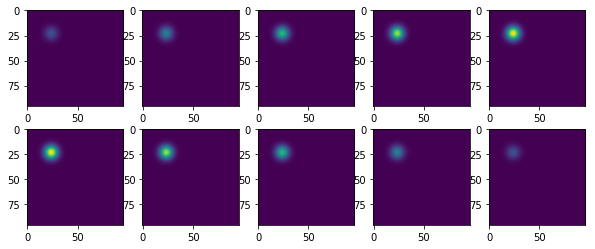

In [6]:
# Answer, b
cx = 0.25
cy = 0.25
sigma_xy = 0.05
sigma_t = 0.3
gauss = make_3d_gauss(cx, cy, sigma_xy, sigma_t)
fig, axs = plt.subplots(2, 5, figsize=(10,4))
for gg, ax in zip(gauss.T, axs.flatten()):
    ax.imshow(gg.T, vmin=0, vmax=1)

## Exercise 02: 
Make a 3D grating! As a reminder, here's the formula

## $ sin((x-cx_i) * fx_i + (y-cy_i) * fy_i + (t-ct_i)ft_i + p)$

$fx_i$ is the x frequency of the grating, which you should compute from the desired orientation of the grating; $fy_i$ is the y frequency of the grating, which you should compute from the desired orientation of the grating. See the example function below to show you how to compute those. Once again, ct will be 0.5, and t should range in value from 0 to 1.

So, your function should be of the form:

```python
def make_3D_grating(orientation, spatial_frequency, temporal_frequency, cx, cy, x=some_value, y=some_value, t=some_value):
    fx = -spatial_frequency * np.cos(orientation / 180 * np.pi) * 2 * np.pi
    fy = spatial_frequency * np.sin(orientation / 180 * np.pi) * 2 * np.pi
    ft = temporal_frequency * 2 * np.pi
    grat = 0 # some math!
    return grat
```



In [4]:
# Answer a
def make_3D_grating(orientation, spatial_frequency, temporal_frequency, phase, cx, cy, 
                    x=ix, y=iy, t=it):
    '''phase is from 0-2pi'''
    fx = -spatial_frequency * np.cos(orientation / 180 * np.pi) * 2 * np.pi
    fy = spatial_frequency * np.sin(orientation / 180 * np.pi) * 2 * np.pi
    ft = temporal_frequency * 2 * np.pi
    grat = np.sin((x-cx) * fx + (y-cy) * fy + (t-0.5) * ft + phase)
    #grat = np.sin((ix - center_x) * fx + (iy - center_y) * fy + (it - 0.5) * ft + phase)
    return grat



Note the subtle shift in the grating over time (across different images, here) -it's drifting!

In [9]:
2.666 / 0.666

4.003003003003003

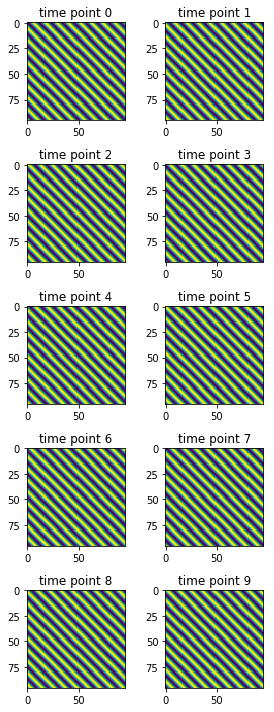

In [10]:
# Answer, b
orientation = 45
spatial_frequency = 12
temporal_frequency = 2.6666 # This is cycles per time window, and since the time window is 10 frames = 0.6666 seconds, 
# the temporal frequency of this filter is 2.6666 / 0.666666 seconds = ~ 4 hz
phase = 0
grat = make_3D_grating(orientation, spatial_frequency, temporal_frequency, phase, cx, cy)
fig, axs = plt.subplots(5, 2, figsize=(4,10))
for i, ax in enumerate(axs.flatten()): 
    ax.set_title('time point %d'%i)
    ax.imshow(grat[:,:,i], vmin=-1, vmax=1)
plt.tight_layout()

In [ ]:
# Answer,c (Going back and creating different phase gratings)
# Note: this is set to a very low spatial frequency to make the phase difference obvious; it's not an 
# optimal temporal frequency to use below!
grat1 = make_3D_grating(0, 1, 2.6, 0 + np.pi/4, 0.5, 0.5)
grat2 = make_3D_grating(0, 1, 2.6, np.pi/2 + np.pi/4, 0.5, 0.5)
fig, axs = plt.subplots(2, 1)
axs[0].imshow(grat1[...,0])
axs[1].imshow(grat2[...,0])

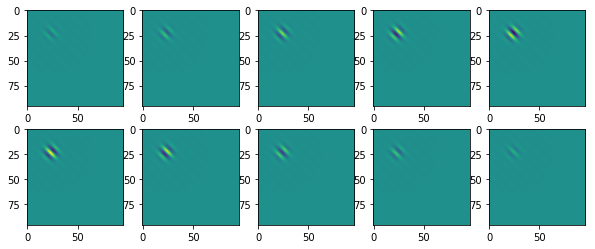

In [11]:
# Combine the gaussian and the grating to define the Gabor filter, and display it!  
gab = grat * gauss
fig, axs = plt.subplots(2, 5, figsize=(10,4))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(gab[:,:,i], vmin=-1, vmax=1)

# Multiply this Gabor by a stack of images

In [12]:
# Load images (these were part of the validation images used in Nishimoto et al 2011)
ims = np.load('/unrshare/LESCROARTSHARE/data_PSY763/natural_movie_450frames.npy')
# These are the spaitally downsampled , luminance channels only 
print(ims.shape)

(96, 96, 450)


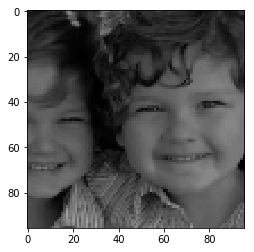

In [13]:
# play with me! (change frame)
frame = 100
plt.imshow(ims[:,:,frame], cmap='gray', vmin=0, vmax=100)

# Compute a response for first (valid) block of times
Multiply the array defining the Gabor filter with a chunk of images that is the same size, and take the sum of all values.

In [14]:
print(gab.shape)
print(ims.shape)

(96, 96, 10)
(96, 96, 450)


In [15]:
# Take a chunk of the stimulus (ims) that matches the shape of the Gabor filter, and multiply the two!
st = 0
fin = 10
resp = np.sum(gab * ims[:,:,st:fin])
print(resp)

-15.62636838215311


## Exercise 03: 
Now compute this for all valid frames of the stimulus! (up to the point that the Gabor filter bumps up against the first / last movie frame). 

Plot the response!

In [16]:
# Answer, a
resp = np.zeros((440,))
for st in range(0, 440):
    fin = st + 10
    resp[st] = np.sum(gab * ims[:,:,st:fin])

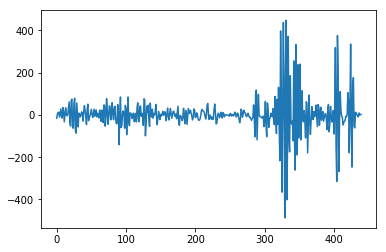

In [17]:
plt.plot(resp)

It's interesting to go back and look at the stimulus movie when there are big bumps in the motion energy timecourse. What happens at/near the following timepoints?

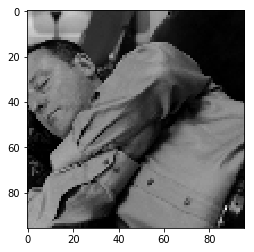

In [18]:
# Things happen at: ~308, ~180 ~ 290; set the index to points before and after that and explore what happened!
idx = 295
plt.imshow(ims[...,idx], cmap='gray')

The responses we have been plotting are ALMOST but NOT QUITE the responses of a motion energy filter over time. What's missing??

What has to be done finish the computation of motion energy? 

## Go back and add the missing component of the model! 
(as we discussed in class, there are two missing steps: (1) defining two Gabors based on gratings with different phases (0 and $\pi/2$), and (2) taking the log (just `np.log()` of the result. 

It would also be a good exercise to define Gabor filters at different locations, sizes, or temporal frequencies, and then to re-run-everything to see how the responses change!

Note also that some values here are HUGE relative to others; this is one reason to take the log!

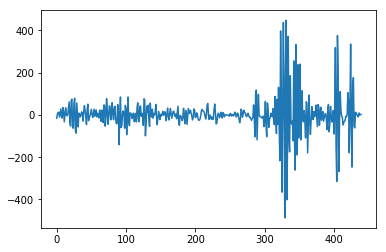

In [19]:
plt.plot(resp)

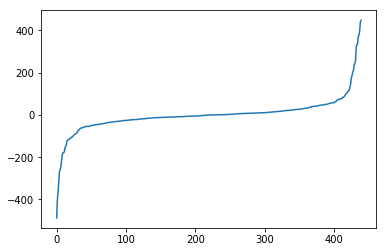

In [20]:
# Like, WHOA
plt.plot(sorted(resp))

NOT SO GAUSSIAN. Many values way out in the tails! 

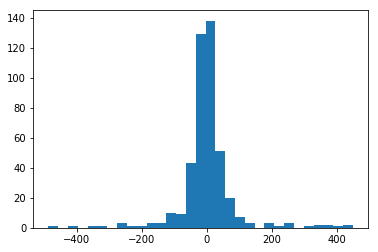

In [21]:
plt.hist(resp, bins=31);

One reason that we square and take the log:

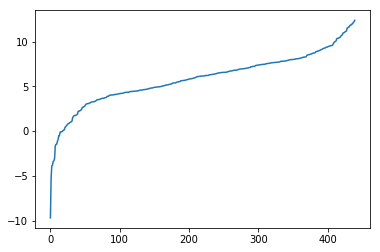

In [22]:
# Aaaaaahhh...
plt.plot(sorted(np.log(resp**2)))

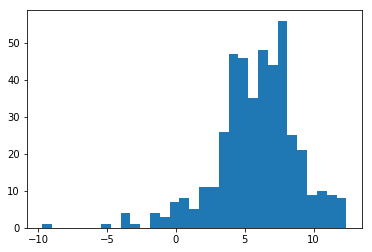

In [23]:
# Way moar Gaussian, thus way happier for regression
plt.hist(np.log(resp**2), bins=31);

And because I can't help myself:

In [24]:
from IPython.display import HTML
import fancy_utils as fu

In [27]:
gabx = gab.copy()
gabx[np.abs(gab) < 0.1] = np.nan
anim = fu.make_fancy_anim(resp=np.log(resp**2), gab=gabx, stim=ims, extent=[-10, 10, -10, 10], cmap='RdBu_r', alpha=0.5)

In [28]:
HTML(anim.to_html5_video())